In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### upload data

In [25]:
headers = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

dfcleveland = pd.read_csv("processed.cleveland.data", names=headers, na_values="?")
dfhungarian = pd.read_csv("processed.hungarian.data", names=headers, na_values="?")
dfswitzerland = pd.read_csv("processed.switzerland.data", names=headers, na_values="?")
dfva = pd.read_csv("processed.va.data", names=headers, na_values="?")

In [26]:
# merge data
SAVE = False
dfu = pd.concat([dfcleveland, dfhungarian, dfswitzerland, dfva], ignore_index=True)
if SAVE:
    dfu.to_csv("mergedata.csv", index=False)
# upload merged data
dfm = pd.read_csv("mergedata.csv")

### data cleaning

In [27]:
#atributes and instances
print("atributes: ", dfm.shape[1])
print("instances: ", dfm.shape[0])

atributes:  14
instances:  920


In [28]:
dfm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [29]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB


In [30]:
dfm.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [31]:
dfm.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [32]:
#replace missing values with mean using knn(k-vecinos mas cercanos)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
dfclean = pd.DataFrame(imputer.fit_transform(dfm),columns = dfm.columns)

In [33]:
dfclean.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
dfclean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,132.407609,199.595652,0.188587,0.603804,136.970109,0.389674,0.878478,1.748913,0.795109,5.510326,0.995652
std,9.424685,0.408148,0.930969,18.739426,109.456209,0.376875,0.805204,25.546964,0.480356,1.075255,0.567528,0.797935,1.649068,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,176.750000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,139.000000,0.000000,0.500000,2.000000,0.500000,6.500000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.500000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### data visualization - correlation matrix

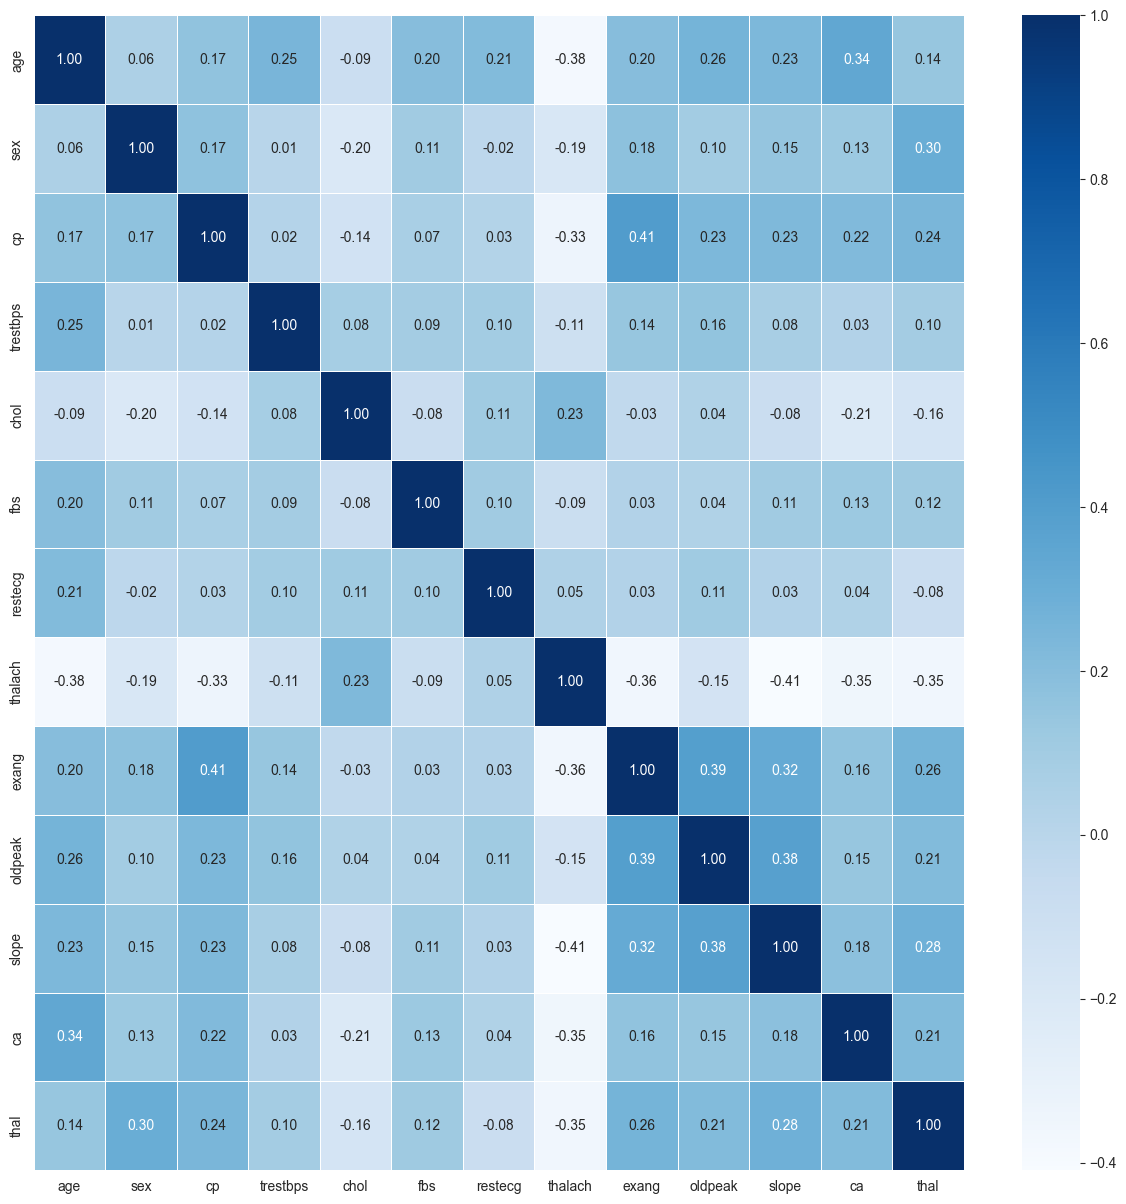

In [35]:
# correlation matrix without target
corr = dfclean.drop("target", axis=1).corr()
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, ax=ax,cmap="Blues")
plt.show()

### data visualization - pearson correlation

In [36]:
# pearson correlation without target matrix
corr = dfclean.drop("target", axis=1).corrwith(dfclean.target)
corr = corr.sort_values(ascending=False)
corr = corr[corr > 0.1]
corr = corr[corr < 0.9]
corr = corr.dropna()
corr = corr.sort_values(ascending=False)
corr

oldpeak     0.427010
cp          0.397896
ca          0.394635
exang       0.386684
age         0.339596
thal        0.297701
slope       0.296143
sex         0.259342
fbs         0.174986
restecg     0.140041
trestbps    0.117061
dtype: float64

### data visualization - boxplot for outliers

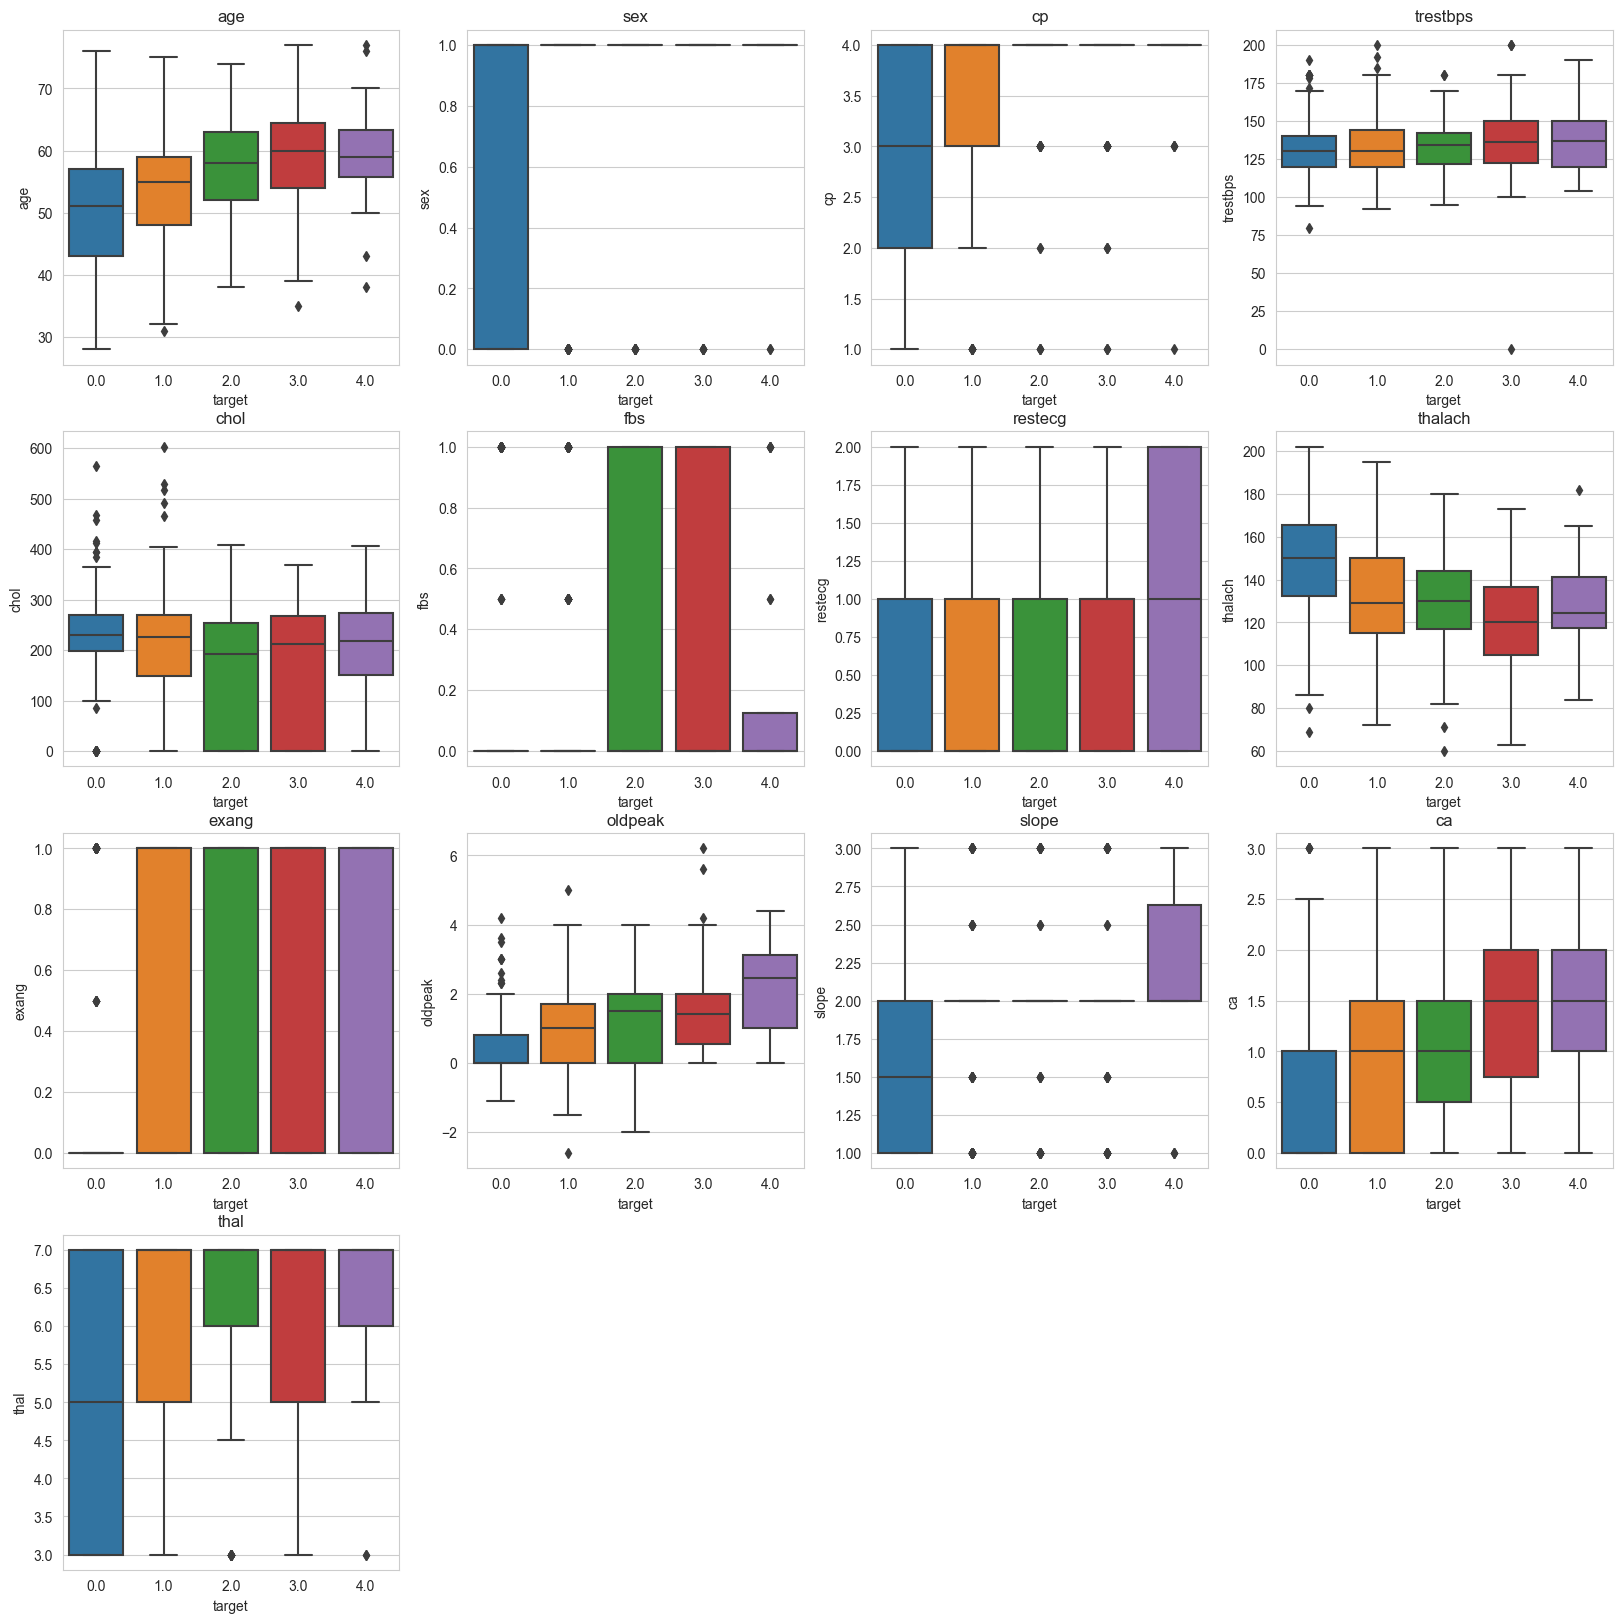

atributes:  14
instances:  920


In [48]:
# boxplot for outliers
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < len(dfclean.columns) - 1:
        sns.boxplot(x='target', y=dfclean.columns[i], data=dfclean, ax=ax)
        ax.set_title(dfclean.columns[i])
    else:
        ax.set_axis_off()
plt.show()

print("atributes: ", dfclean.shape[1])
print("instances: ", dfclean.shape[0])

### eliminar outliers

In [52]:
dfwithoutoutliers1 = dfclean.copy()
dfwithoutoutliers1.head()
#manejar outliers con n-vecinos mas cercanos



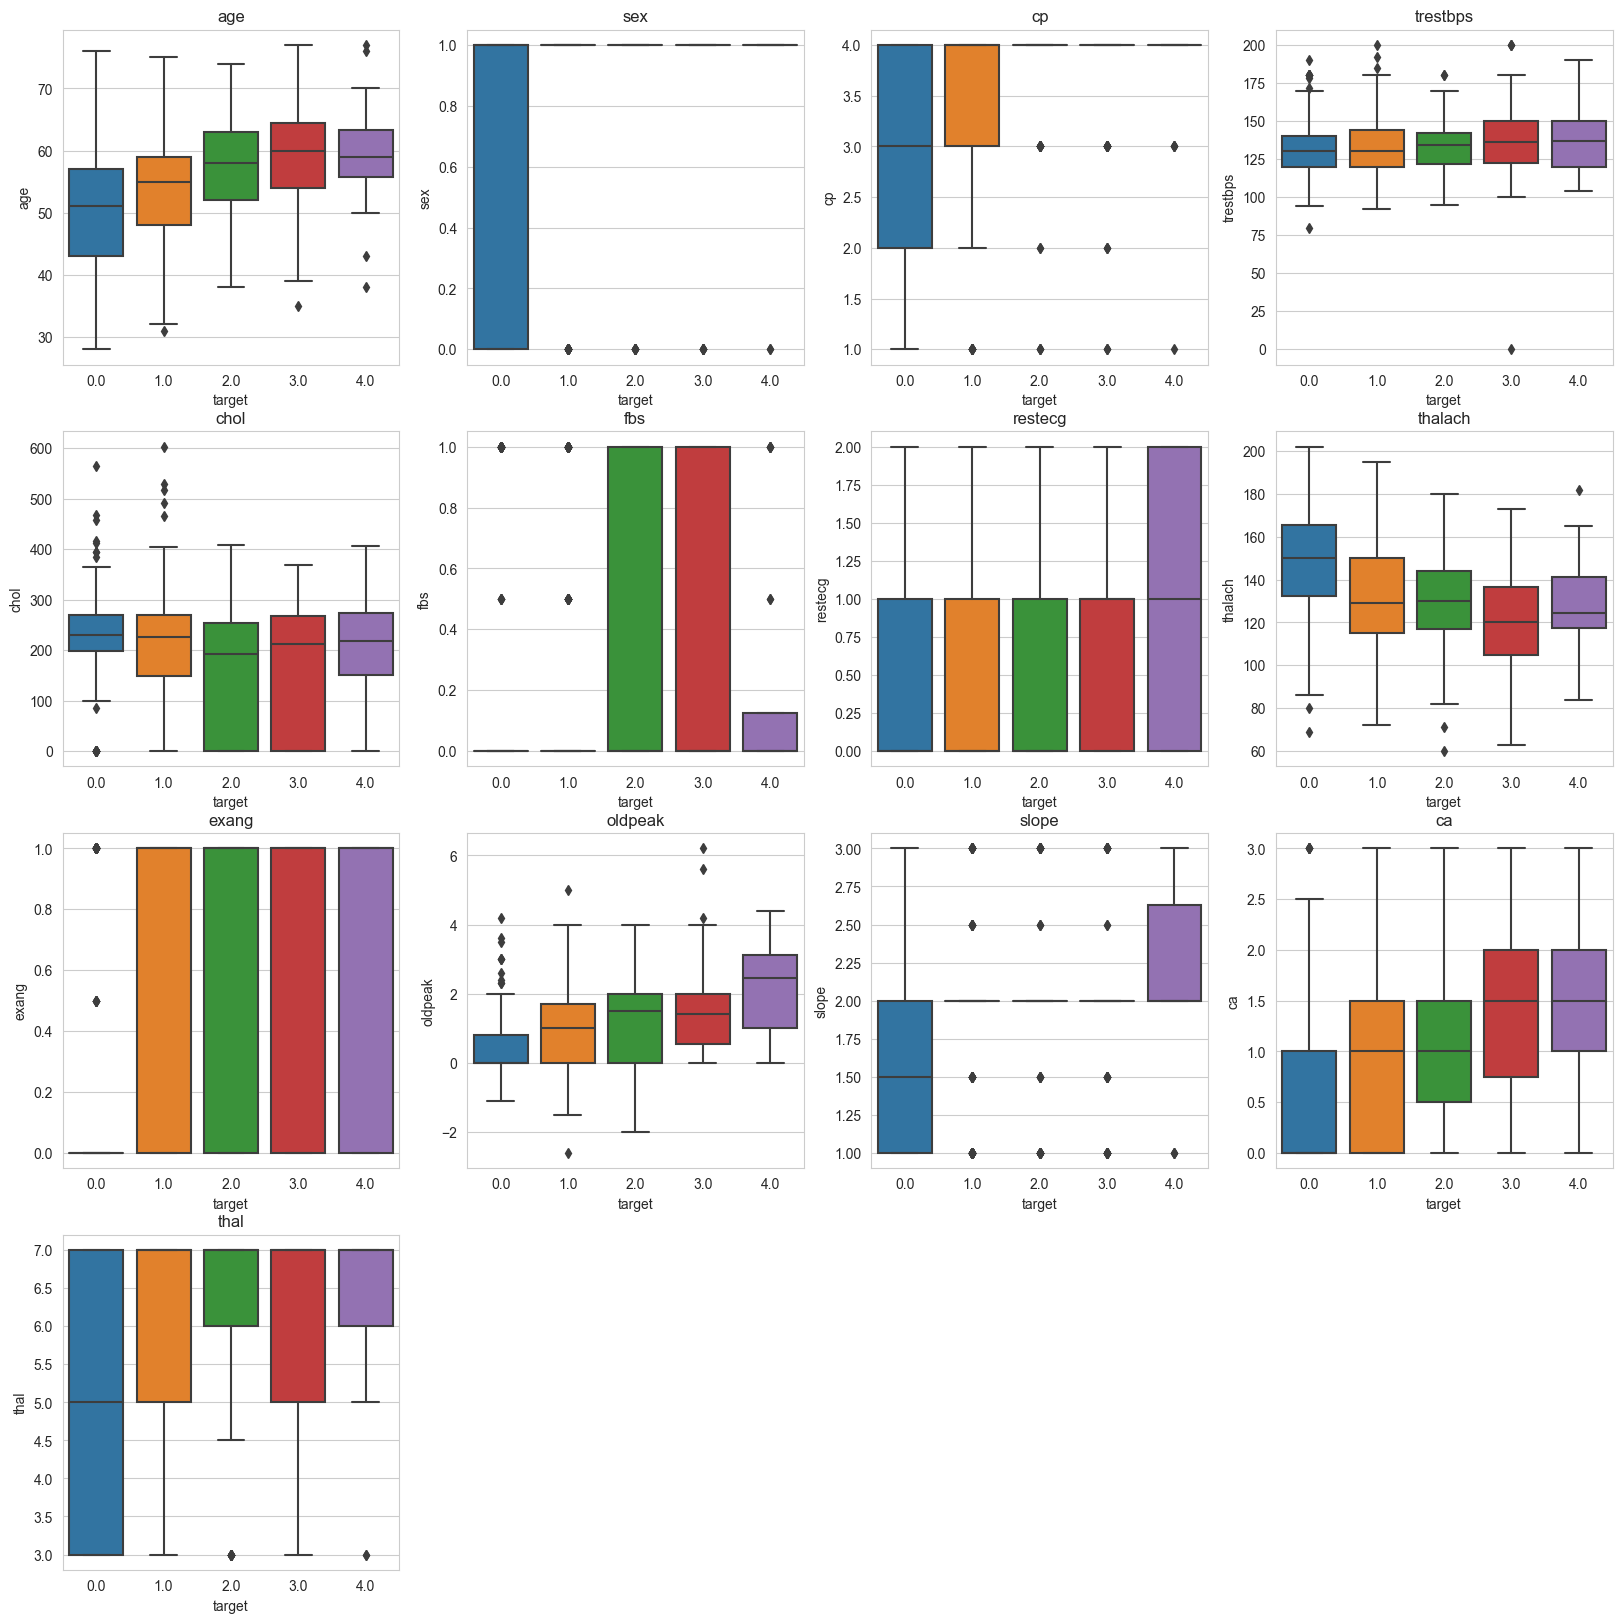

atributes:  14
instances:  920


In [54]:
# boxplot for outliers
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < len(dfwithoutoutliers1.columns) - 1:
        sns.boxplot(x='target', y=dfclean.columns[i], data=dfclean, ax=ax)
        ax.set_title(dfclean.columns[i])
    else:
        ax.set_axis_off()
plt.show()

print("atributes: ", dfwithoutoutliers1.shape[1])
print("instances: ", dfwithoutoutliers1.shape[0])

### data mining

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [56]:
x = dfwithoutoutliers.drop("target", axis=1)
y = dfwithoutoutliers.target

In [57]:
dfwithoutoutliers1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [58]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [59]:
#create pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

In [60]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [61]:
y_pred = pipe.predict(x_test)

In [62]:
#metrics in porcent
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred, average='micro') * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred, average='micro') * 100:.2f}%")
print(f"F1: {f1_score(y_test, y_pred, average='micro') * 100:.2f}%")


Accuracy: 57.61%
Precision: 57.61%
Recall: 57.61%
F1: 57.61%


### MATRIZ DE CONFUSION

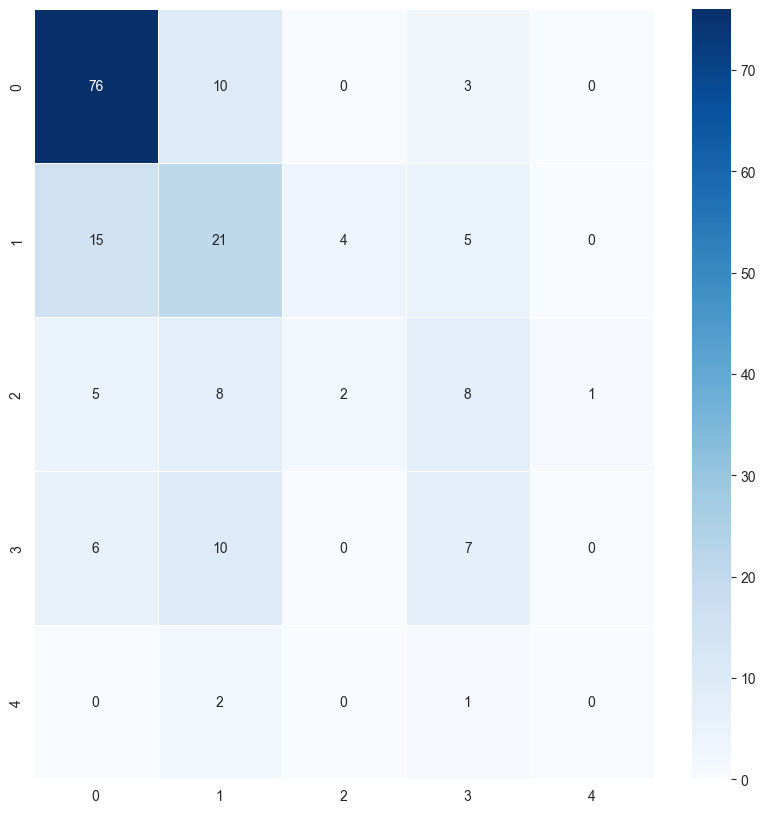

In [63]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#visualize confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="Blues")
plt.show()


In [64]:
#classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80        89
         1.0       0.41      0.47      0.44        45
         2.0       0.33      0.08      0.13        24
         3.0       0.29      0.30      0.30        23
         4.0       0.00      0.00      0.00         3

    accuracy                           0.58       184
   macro avg       0.36      0.34      0.33       184
weighted avg       0.54      0.58      0.55       184

